In [3]:
import pandas as pd
import numpy as np
import csv

#Inputs the CSV file into the notebook 
titanic = pd.read_csv("titanic_data.csv")
print(titanic)

#This version contains some rows that are not complete

    PassengerId  Survived  Pclass  \
0             1       0.0     3.0   
1             2       1.0     1.0   
2             3       1.0     3.0   
3             4       1.0     1.0   
4             5       0.0     3.0   
..          ...       ...     ...   
887         888       1.0     1.0   
888         889       0.0     3.0   
889         890       1.0     1.0   
890         891       0.0     3.0   
891         >>        NaN     NaN   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0    1.0   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0    1.0   
2                               Heikkinen, Miss. Laina  female  26.0    0.0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0    1.0   
4                             Allen, Mr. William Henry    male  35.0    0.0   
..                                                 ...     ...   ...    ...   
88

In [ ]:
#Cleaning data to remove rows were atleast one variable is missing and only look in 
titanic.dropna
titanic.dropna(how='all')
titanic.dropna(subset=['Survived', 'Pclass', 'Sex', 'Age'])

In [226]:
#Provides information on the Excel file categories
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  892 non-null    object 
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    float64
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    float64
 7   Parch        891 non-null    float64
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(6), object(6)
memory usage: 83.8+ KB


In [39]:
#Made it a new variable to show it's revised without the following columns
r_titanic = titanic.drop(columns =['Cabin','Fare','Parch', 'Embarked',"PassengerId", 'Ticket', 'SibSp', 'Name'])

In [227]:
#new variable info with the columns I want to see
r_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    891 non-null    float64
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
dtypes: float64(3), object(1)
memory usage: 28.0+ KB


In [198]:
#The oldest person on the ship
round(max(r_titanic['Age']))

80

In [149]:
print("The oldest person the Titanic was",round(max(r_titanic['Age'])),"years old!")

The oldest person the Titanic was 80 years old!


In [201]:
#The youngest person on the ship 
min((r_titanic['Age']))# The answer was 0.42 
round(min((r_titanic['Age']))) #I rounded up the answer and it was 0

0

In [12]:
print("The youngest person the Titanic was", min(titanic['Age']),"years old, that means they were just a baby!")

The youngest person the Titanic was 0.42 years old, that means they were just a baby!


In [228]:
print(len(r_titanic))
print("There were", len(r_titanic), "people on the Titanic!")

892
There were 892 people on the Titanic!


In [229]:
#Rounded up the average age on the titanic 
round(r_titanic["Age"].mean())

30

In [230]:
#Rounded the average age by sex 
round(r_titanic[["Sex","Age"]].groupby("Sex").mean())

,Age
Sex,
female,28.0
male,31.0


In [250]:
#Grouped data to see how many people survived/died from each class based on sex
r_titanic.groupby(["Sex", "Pclass"])["Survived"].count()

Sex     Pclass
female  1.0        94
        2.0        76
        3.0       144
male    1.0       122
        2.0       108
        3.0       347
Name: Survived, dtype: int64

In [146]:
#Printing the number of most survivors based on gender and class 
print("Women from third class had the most survivors!")
print("Men from 3rd class had the most survivors!")

Women from third class had the most survivors!
Men from 3rd class had the most survivors!


In [215]:
#Lists the age,sex, and class for everyone that survived
r_titanic.loc[r_titanic['Survived'] == 1]

,Survived,Pclass,Sex,Age
1,1.0,1.0,female,38.0
2,1.0,3.0,female,26.0
3,1.0,1.0,female,35.0
8,1.0,3.0,female,27.0
9,1.0,2.0,female,14.0
...,...,...,...,...
875,1.0,3.0,female,15.0
879,1.0,1.0,female,56.0
880,1.0,2.0,female,25.0
887,1.0,1.0,female,19.0


In [217]:
##Lists the age,sex, and class for everyone that survived
r_titanic.loc[r_titanic['Survived'] == 0]

,Survived,Pclass,Sex,Age
0,0.0,3.0,male,22.0
4,0.0,3.0,male,35.0
5,0.0,3.0,male,NaN
6,0.0,1.0,male,54.0
7,0.0,3.0,male,2.0
...,...,...,...,...
884,0.0,3.0,male,25.0
885,0.0,3.0,female,39.0
886,0.0,2.0,male,27.0
888,0.0,3.0,female,NaN


In [255]:
#Percentage of people that survived and died 
round(r_titanic["Survived"].value_counts("1.0")*100)

Survived
0.0    62.0
1.0    38.0
Name: proportion, dtype: float64

In [279]:
r_titanic.loc[r_titanic['Survived'] == 1]

,Survived,Pclass,Sex,Age
1,1.0,1.0,female,38.0
2,1.0,3.0,female,26.0
3,1.0,1.0,female,35.0
8,1.0,3.0,female,27.0
9,1.0,2.0,female,14.0
...,...,...,...,...
875,1.0,3.0,female,15.0
879,1.0,1.0,female,56.0
880,1.0,2.0,female,25.0
887,1.0,1.0,female,19.0


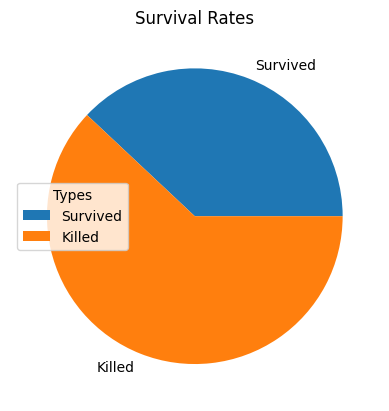

In [15]:
#Pie chart for "Survived Variable"

import matplotlib.pyplot as plt
import numpy as np

y = np.array([38, 62])
my_labels = ["Survived", "Killed"]
my_title = ["Survival Percentages"]


plt.pie(y, labels = my_labels)

plt.title("Survival Rates")
plt.legend(title = "Types", loc = "center left")
plt.show() 



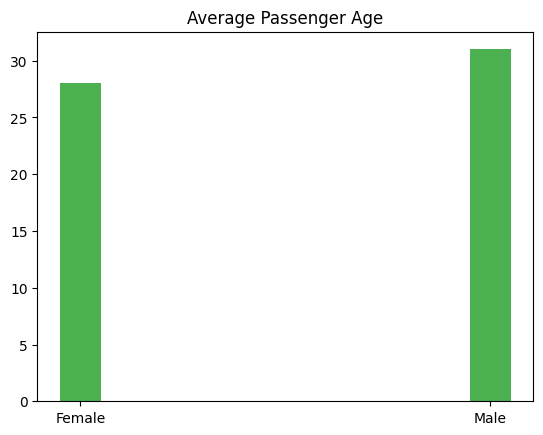

In [14]:
#Bar graph for comparing ages

plt.title("Average Passenger Age")
x = np.array(["Female", "Male"])
y = np.array([28, 31])

plt.bar(x, y, width = 0.1, color = "#4CAF50")
plt.show()

